In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
from numpy import random

In [2]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * FROM Country", con)
    matches = pd.read_sql_query("SELECT * FROM Match", con)
    leagues = pd.read_sql_query("SELECT * FROM League", con)
    teams = pd.read_sql_query("SELECT * FROM Team", con)    

In [3]:
selected_countries = ['England','France','Germany','Italy','Spain']

countries = countries[countries.name.isin(selected_countries)]

leagues = countries.merge(leagues, on='id', suffixes=('', '_y'))

In [4]:
matches = matches[matches.league_id.isin(leagues.id)]

matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]

matches.dropna(inplace=True)

matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,3.4,4.33


In [5]:
from scipy.stats import entropy

In [187]:
def get_entropy(row):

    odds = [row['B365H'],row['B365D'],row['B365A']]
    probs = [1/o for o in odds]
    norm = sum(probs)
    probs = [p/norm for p in probs]

    return entropy(probs)

In [11]:
x

array([ 0.73898039,  0.64118599,  0.97592787, ...,  0.90785633,
        1.08446121,  1.07882082])

In [191]:
matches['entropy'] = matches.apply(get_entropy, axis=1)

In [13]:
[probs[0].values[0],probs[1].values[0],probs[2].values[0]]

[0.73974445191661076, 0.17350369872225962, 0.086751849361129812]

In [93]:
x

array([ 0.73898039,  0.64118599,  0.97592787, ...,  0.90785633,
        1.08446121,  1.07882082])

In [92]:
n = [probs[0].values[0],probs[1].values[0],probs[2].values[0]]
entropy(n)

0.73898038644835884

In [37]:
entropy_means = matches.groupby(('season','league_id')).entropy.mean()

entropy_means = entropy_means.reset_index().pivot(index='season',columns='league_id', values='entropy')

entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]

In [38]:
entropy_means

,England,France,Germany,Italy,Spain
season,,,,,
2008/2009,0.984556,1.026638,1.004276,1.002201,1.010859
2009/2010,0.956496,1.013821,0.997925,1.006755,0.977810
2010/2011,0.983258,1.026236,1.016264,1.006029,0.975032
2011/2012,0.969593,1.024915,1.001298,1.003077,0.955339
2012/2013,0.981472,1.016116,0.993993,1.003565,0.970580
2013/2014,0.960473,1.004439,0.977500,0.992622,0.944218
2014/2015,0.980301,1.012495,0.985835,0.999100,0.933637
2015/2016,0.997819,1.013928,0.974657,0.985284,0.946813


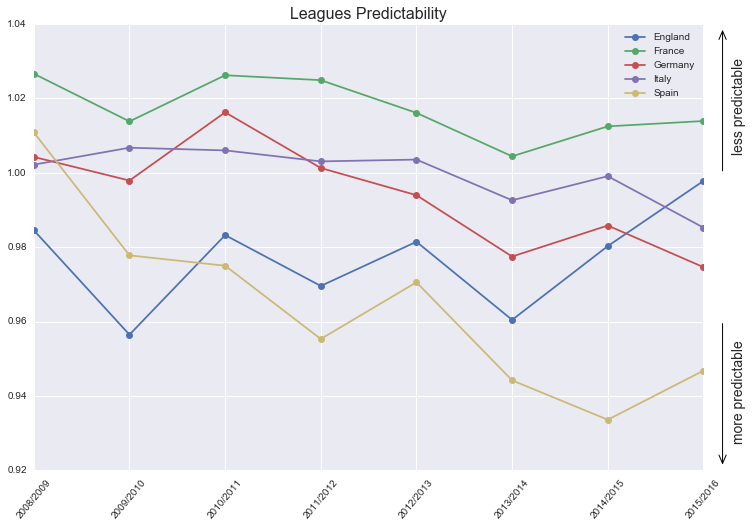

In [70]:
ax = entropy_means.plot(figsize=(12,8), marker='o')

plt.title('Leagues Predictability', fontsize=16)
plt.xticks(rotation=50)

colors = [x.get_color() for x in ax.get_lines()]
colors_mapping = dict(zip(leagues.id,colors))

ax.set_xlabel('')
plt.legend(loc='best')

ax.annotate('', xytext=(7.2,1), xy=(7.2, 1.039), 
                        arrowprops=dict(facecolor='black',arrowstyle='->, head_length=.7, head_width=.3', linewidth=1),
                        annotation_clip=False)

ax.annotate('', xytext=(7.2,0.96), xy=(7.2, 0.921), 
                        arrowprops=dict(facecolor='black',arrowstyle='->, head_length=.7, head_width=.3', linewidth=1),
                        annotation_clip=False)

ax.annotate('less predictable', xy=(7.3, 1.028), annotation_clip=False, fontsize=14, rotation='vertical')

ax.annotate('more predictable', xy=(7.3, 0.952), annotation_clip=False, fontsize=14, rotation='vertical')

In [58]:
dict(facecolor='black',arrowstyle='->, head_length=.7, head_width=.3', linewidth=1)

{'arrowstyle': '->, head_length=.7, head_width=.3',
 'facecolor': 'black',
 'linewidth': 1}

In [51]:
colors_mapping

{1729: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 4769: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 7809: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 10257: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 21518: (0.8, 0.7254901960784313, 0.4549019607843137)}

In [94]:
from numpy import sum, log

In [108]:
from matplotlib.lines import Line2D

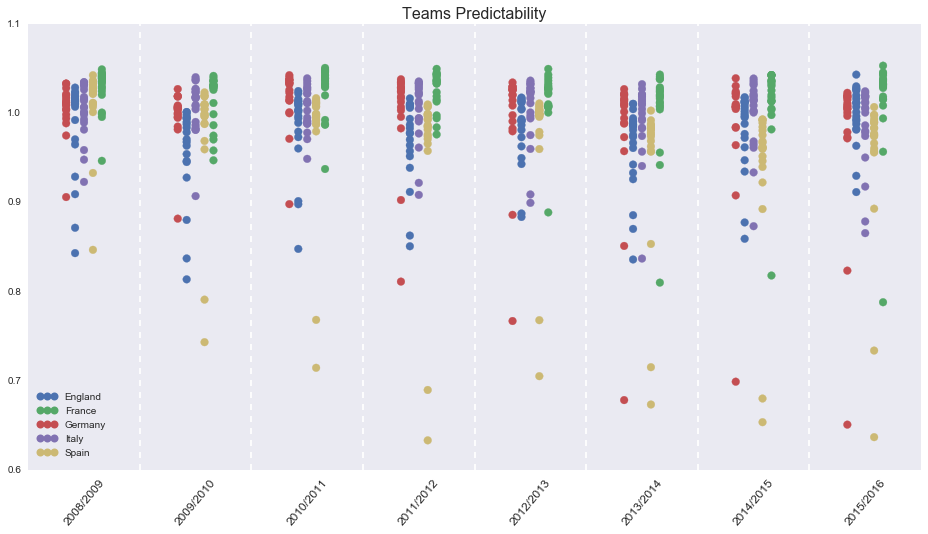

In [265]:
barcelona = teams[teams.team_long_name=='FC Barcelona'].team_api_id.values[0]

offsets = [-0.16,-0.08,0,0.08,0.16]
offsets_mapping = dict(zip(colors_mapping.keys(),offsets))
y = []
x = []
c = []

i = -1
for season,season_df in matches.groupby('season'):
    i+=1
    for team,name in zip(teams.team_api_id,teams.team_long_name):
        team_df = season_df[(season_df.home_team_api_id==team)|(season_df.away_team_api_id==team)]
        team_entropy = team_df.entropy.mean()
        if team_entropy>0:
            league_id = team_df.league_id.values[0]
            x.append(i+offsets_mapping[league_id])
            y.append(team_entropy)
            c.append(colors_mapping[league_id])
            
plt.figure(figsize=(16,8))
plt.scatter(x,y,color=c,s=[60]*len(x))
plt.title('Teams Predictability', fontsize=16)

ax = plt.gca()
plt.xlim((-0.5,7.5))
plt.xticks(np.arange(0,8,1), rotation=50)

ax.set_xticklabels(entropy_means.index, fontsize=12)
for i in range(7):
    ax.axvline(x=0.5+i, ls='--',c='w')
ax.yaxis.grid(False)
ax.xaxis.grid(False)

circles = []
labels = []
for league_id,name in zip(leagues.id,leagues.name):
    labels.append(name)
    circles.append(Line2D([0],[0], linestyle='none', marker='o', markersize=8, markerfacecolor=colors_mapping[league_id]))
    plt.legend(circles, labels, numpoints=3, loc=(0.005,0.02))

In [266]:
entropy([0.3333,0.3333,0.3333])

1.0986122886681096

In [267]:
0.73974445191661076+ 0.17350369872225962+ 0.086751849361129812

1.0000000000000002

In [268]:
entropy([0.9,0,0.1])

0.3250829733914482

In [290]:
cap.tail()

,index,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A,entropy
14568,10295,10296,10257,10257,2008/2009,12,539674,8524,9875,2.80,2.88,2.75,1.098432
14569,5006,5007,4769,4769,2008/2009,30,483450,9874,9851,2.75,2.80,2.87,1.098459
14570,4945,4946,4769,4769,2008/2009,25,483376,9831,9851,2.75,2.87,2.80,1.098459
14571,7488,7489,4769,4769,2015/2016,15,1989918,8121,8639,2.90,2.90,2.80,1.098474
14572,7625,7626,4769,4769,2015/2016,27,1990147,7794,9830,2.88,2.90,2.80,1.098496


In [291]:
entropy([2.8,2.88,2.75])

1.0984310635477044

In [287]:
matches.entropy.mean()

0.9902513305255465

In [276]:
vh = sum([1/2.8,1/2.88,1/2.75])

In [279]:
vh = [0.35714285714285715/vh, 0.3472222222222222/vh, 0.36363636363636365/vh]
vh

[0.33440297247086648, 0.32511400101334237, 0.34048302651579132]

In [280]:
entropy(vh)

1.0984322600790493